In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('StudentsPerformance.csv')
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
dataset.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

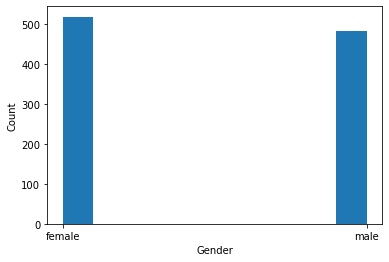

In [4]:
plt.hist(dataset['gender'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

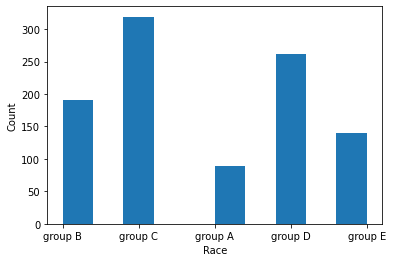

In [5]:
plt.hist(dataset['race/ethnicity'])
plt.xlabel("Race")
plt.ylabel("Count")
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


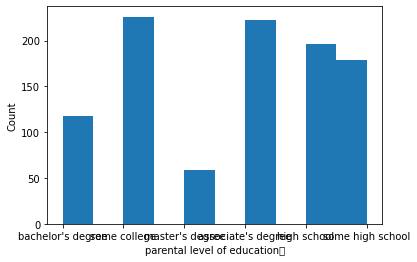

In [6]:
plt.hist(dataset['parental level of education'])
plt.xlabel("parental level of education	")
plt.ylabel("Count")
plt.show()

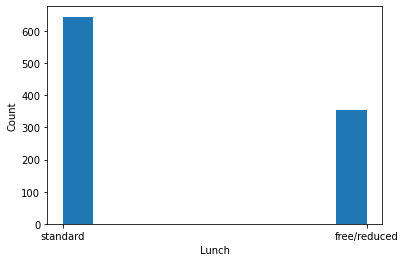

In [7]:
plt.hist(dataset['lunch'])
plt.xlabel("Lunch")
plt.ylabel("Count")
plt.show()

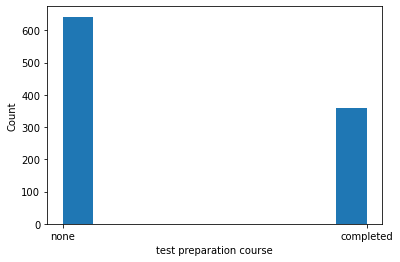

In [8]:
plt.hist(dataset['test preparation course'])
plt.xlabel("test preparation course")
plt.ylabel("Count")
plt.show()

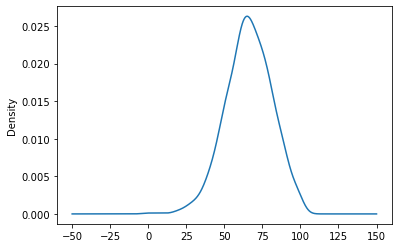

In [9]:
dataset['math score'].plot(kind="density")
plt.show()

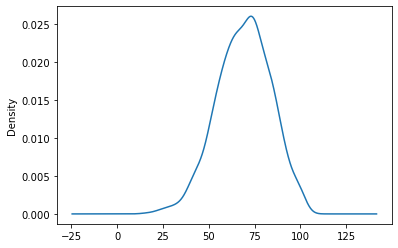

In [10]:
dataset['reading score'].plot(kind="density")
plt.show()

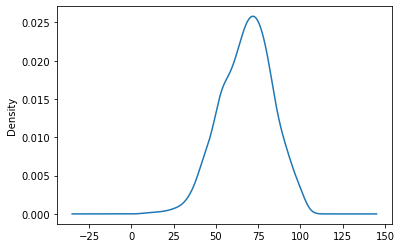

In [11]:
dataset['writing score'].plot(kind="density")
plt.show()

In [12]:
dataset['math score'].max(), dataset['reading score'].max(), dataset['writing score'].max()

(100, 100, 100)

In [13]:
dataset['math score'].min(), dataset['reading score'].min(), dataset['writing score'].min()

(0, 17, 10)

In [14]:
dataset.shape

(1000, 8)

In [15]:
dataset['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [16]:
dataset['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [17]:
dataset['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [18]:
dataset['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [19]:
dataset['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [20]:
dataset_encoded = pd.get_dummies(dataset, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])

In [21]:
dataset_encoded.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [22]:
dataset_reduced = dataset_encoded.drop(columns = ['gender_male', 'race/ethnicity_group E', 'parental level of education_some high school', 'lunch_free/reduced', 'test preparation course_none'])

In [23]:
dataset_math = dataset_reduced.drop(columns=['reading score', 'writing score'])
dataset_reading = dataset_reduced.drop(columns=['math score', 'writing score'])
dataset_writing = dataset_reduced.drop(columns=['reading score', 'math score'])

In [24]:
dataset_math.head()

,math score,gender_female,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_standard,test preparation course_completed
0,72,1,0,1,0,0,0,1,0,0,0,1,0
1,69,1,0,0,1,0,0,0,0,0,1,1,1
2,90,1,0,1,0,0,0,0,0,1,0,1,0
3,47,0,1,0,0,0,1,0,0,0,0,0,0
4,76,0,0,0,1,0,0,0,0,0,1,1,0


## Training Math Model

In [25]:
X_m, y_m = dataset_math.drop(columns='math score'), dataset_math['math score']

In [26]:
X_m.head()

,gender_female,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_standard,test preparation course_completed
0,1,0,1,0,0,0,1,0,0,0,1,0
1,1,0,0,1,0,0,0,0,0,1,1,1
2,1,0,1,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,1,0


In [27]:
y_m.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_m, y_m, test_size=0.20, random_state=13)

In [29]:
X_train.shape, X_test.shape

((800, 12), (200, 12))

In [30]:
y_train.shape, y_test.shape

((800,), (200,))

In [31]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

In [32]:
model1.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = model1.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae1 = mean_absolute_error(y_test, y_pred)
mse1 = mean_squared_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)

In [35]:
mae1, mse1, r2_1

(10.718991398660217, 176.92403341348364, 0.1754437083705045)

In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly_transform = PolynomialFeatures(2, interaction_only=True)
X_train_poly = poly_transform.fit_transform(X_train)

In [37]:
X_train_poly

array([[1., 1., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

In [38]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X_train_poly, y_train)

LinearRegression()

In [39]:
y_pred = model2.predict(poly_transform.fit_transform(X_test))

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae2 = mean_absolute_error(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)
mae2, mse2, r2_2

(11.148327930643791, 191.01973593429872, 0.10975054066325018)

In [41]:
from sklearn.svm import SVR

model3 = SVR()
model3.fit(X_train, y_train)

SVR()

In [42]:
y_pred = model3.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae3 = mean_absolute_error(y_test, y_pred)
mse3 = mean_squared_error(y_test, y_pred)
r2_3 = r2_score(y_test, y_pred)
mae3, mse3, r2_3

(10.796435407620839, 182.77551063970066, 0.14817283810423654)

In [44]:
model4 = SVR(kernel='linear')
model4.fit(X_train, y_train)

SVR(kernel='linear')

In [45]:
y_pred = model4.predict(X_test)

In [46]:
mae4 = mean_absolute_error(y_test, y_pred)
mse4 = mean_squared_error(y_test, y_pred)
r2_4 = r2_score(y_test, y_pred)
mae4, mse4, r2_4

(10.746903143098368, 180.94714681005712, 0.15669394668419434)

In [47]:
model5 = SVR(kernel='sigmoid')
model5.fit(X_train, y_train)

SVR(kernel='sigmoid')

In [48]:
y_pred = model5.predict(X_test)

In [49]:
mae5 = mean_absolute_error(y_test, y_pred)
mse5 = mean_squared_error(y_test, y_pred)
r2_5 = r2_score(y_test, y_pred)
mae5, mse5, r2_5

(10.660028483887766, 183.8402108520017, 0.14321079172865825)

In [50]:
model6 = SVR(kernel='poly')
model6.fit(X_train, y_train)
y_pred = model6.predict(X_test)

mae6 = mean_absolute_error(y_test, y_pred)
mse6 = mean_squared_error(y_test, y_pred)
r2_6 = r2_score(y_test, y_pred)
mae6, mse6, r2_6

(10.997702174251216, 182.68442193563658, 0.1485973579537072)

In [51]:
model7 = SVR(kernel='poly', degree=4)
model7.fit(X_train, y_train)
y_pred = model7.predict(X_test)

mae7 = mean_absolute_error(y_test, y_pred)
mse7 = mean_squared_error(y_test, y_pred)
r2_7 = r2_score(y_test, y_pred)
mae7, mse7, r2_7

(11.141675346544869, 188.92948363676973, 0.11949218316239296)

In [52]:
model8 = SVR(kernel='poly', degree=5)
model8.fit(X_train, y_train)
y_pred = model8.predict(X_test)

mae8 = mean_absolute_error(y_test, y_pred)
mse8 = mean_squared_error(y_test, y_pred)
r2_8 = r2_score(y_test, y_pred)
mae8, mse8, r2_8

(11.448657994892415, 201.79464212129105, 0.059533978691489464)

In [53]:
import tensorflow as tf

In [54]:
X_train.shape

(800, 12)

In [55]:
# Creating the neural network
tf.random.set_seed(42)

# 1. Creating the model
model9 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[12]),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model9.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Visualizing the model
model9.summary()

tf.keras.utils.plot_model(model=model9, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
 dense_1 (Dense)             (None, 32)                64        
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 750
Trainable params: 750
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install g

In [56]:
history = model9.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 2ms/step - loss: 65.6843 - mae: 65.6843
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 64.5294 - mae: 64.5294
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 61.0389 - mae: 61.0389
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 51.2876 - mae: 51.2876
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 29.9279 - mae: 29.9279
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 18.6242 - mae: 18.6242
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 16.9862 - mae: 16.9862
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 15.8915 - mae: 15.8915
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 15.0035 - mae: 15.0035
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 14.3836 - mae: 14.3836
Epoch 11/100
25/25 [===================

25/25 [==============================] - 0s 2ms/step - loss: 10.9999 - mae: 10.9999
Epoch 86/100
25/25 [==============================] - 0s 3ms/step - loss: 10.9259 - mae: 10.9259
Epoch 87/100
25/25 [==============================] - 0s 2ms/step - loss: 11.0025 - mae: 11.0025
Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 10.9052 - mae: 10.9052
Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 10.9128 - mae: 10.9128
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 10.9195 - mae: 10.9195
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 10.8847 - mae: 10.8847
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 10.8882 - mae: 10.8882
Epoch 93/100
25/25 [==============================] - 0s 2ms/step - loss: 10.8808 - mae: 10.8808
Epoch 94/100
25/25 [==============================] - 0s 2ms/step - loss: 10.8733 - mae: 10.8733
Epoch 95/100
25/25 [=======================

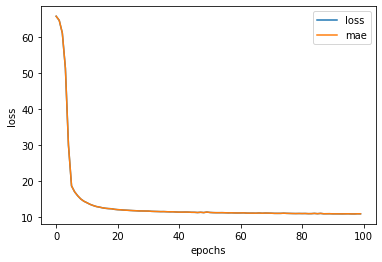

In [57]:
# Ploting history curve

pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [58]:
y_pred = model9.predict(X_test)

mae9 = mean_absolute_error(y_test, y_pred)
mse9 = mean_squared_error(y_test, y_pred)
r2_9 = r2_score(y_test, y_pred)
mae9, mse9, r2_9

7/7 [==============================] - 0s 1ms/step


(10.944607048034667, 187.16590913455366, 0.1277113404103014)

In [59]:
math_metrics = pd.DataFrame({'mae':[mae1, mae2, mae3, mae4, mae5, mae6, mae7, mae8, mae9], 'mse':[mse1, mse2, mse3, mse4, mse5, mse6, mse7, mse8, mse9], 'r2':[r2_1, r2_2, r2_3, r2_4, r2_5, r2_6, r2_7, r2_8, r2_9]})
math_metrics

,mae,mse,r2
0,10.718991,176.924033,0.175444
1,11.148328,191.019736,0.109751
2,10.796435,182.775511,0.148173
3,10.746903,180.947147,0.156694
4,10.660028,183.840211,0.143211
5,10.997702,182.684422,0.148597
6,11.141675,188.929484,0.119492
7,11.448658,201.794642,0.059534
8,10.944607,187.165909,0.127711


In [60]:
math_model = model1

### Linear Regression got the best metrics for math model with mean absolute error of `10.718991`



## Training Reading Model

In [61]:
X_r, y_r = dataset_reading.drop(columns='reading score'), dataset_reading['reading score']

In [62]:
X_r.head()

,gender_female,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_standard,test preparation course_completed
0,1,0,1,0,0,0,1,0,0,0,1,0
1,1,0,0,1,0,0,0,0,0,1,1,1
2,1,0,1,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,1,0


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_m, y_m, test_size=0.20, random_state=12)

In [64]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

mae1 = mean_absolute_error(y_test, y_pred)
mse1 = mean_squared_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)
mae1, mse1, r2_1

(10.030508278367233, 150.73408150296189, 0.25988979907280363)

In [65]:
from sklearn.preprocessing import PolynomialFeatures

poly_transform = PolynomialFeatures(2, interaction_only=True)
X_train_poly = poly_transform.fit_transform(X_train)

model2 = LinearRegression()
model2.fit(X_train_poly, y_train)
y_pred = model2.predict(poly_transform.transform(X_test))

mae2 = mean_absolute_error(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)
mae2, mse2, r2_2

(10.307080224280824, 164.84261154908273, 0.1906163679873678)

In [66]:
from sklearn.svm import SVR

model3 = SVR()
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

mae3 = mean_absolute_error(y_test, y_pred)
mse3 = mean_squared_error(y_test, y_pred)
r2_3 = r2_score(y_test, y_pred)
mae3, mse3, r2_3

(10.328257234302773, 162.9960081919227, 0.19968326226949262)

In [67]:
model4 = SVR(kernel='linear')
model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)

mae4 = mean_absolute_error(y_test, y_pred)
mse4 = mean_squared_error(y_test, y_pred)
r2_4 = r2_score(y_test, y_pred)
mae4, mse4, r2_4

(10.143164465445919, 154.2596514747291, 0.24257911343243455)

In [68]:
model5 = SVR(kernel='sigmoid')
model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)

mae5 = mean_absolute_error(y_test, y_pred)
mse5 = mean_squared_error(y_test, y_pred)
r2_5 = r2_score(y_test, y_pred)
mae5, mse5, r2_5

(10.264904461001173, 158.9788961118645, 0.2194074387734012)

In [69]:
model6 = SVR(kernel='poly')
model6.fit(X_train, y_train)

y_pred = model6.predict(X_test)

mae6 = mean_absolute_error(y_test, y_pred)
mse6 = mean_squared_error(y_test, y_pred)
r2_6 = r2_score(y_test, y_pred)
mae6, mse6, r2_6

(10.349909850499703, 161.4806920443899, 0.2071235234714469)

In [70]:
model7 = SVR(kernel='poly', degree=4)
model7.fit(X_train, y_train)

y_pred = model7.predict(X_test)

mae7 = mean_absolute_error(y_test, y_pred)
mse7 = mean_squared_error(y_test, y_pred)
r2_7 = r2_score(y_test, y_pred)
mae7, mse7, r2_7

(10.460412160341606, 164.9746690664012, 0.189967960442757)

In [71]:
model8 = SVR(kernel='poly', degree=5)
model8.fit(X_train, y_train)

y_pred = model8.predict(X_test)

mae8 = mean_absolute_error(y_test, y_pred)
mse8 = mean_squared_error(y_test, y_pred)
r2_8 = r2_score(y_test, y_pred)
mae8, mse8, r2_8

(10.86673907078052, 176.8368056287646, 0.13172440870542723)

In [72]:
# Creating the neural network
tf.random.set_seed(42)

# 1. Creating the model
model9 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[12]),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model9.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Visualizing the model
model9.summary()

tf.keras.utils.plot_model(model=model9, show_shapes=True)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
 dense_6 (Dense)             (None, 32)                64        
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 750
Trainable params: 750
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install

In [73]:
history = model9.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 65.8128 - mae: 65.8128
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 64.6634 - mae: 64.6634
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 61.2185 - mae: 61.2185
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 51.5263 - mae: 51.5263
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 30.8236 - mae: 30.8236
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 19.1578 - mae: 19.1578
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 17.2362 - mae: 17.2362
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 16.0534 - mae: 16.0534
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 15.2371 - mae: 15.2371
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 14.6114 - mae: 14.6114
Epoch 11/100
25/25 [===================

25/25 [==============================] - 0s 3ms/step - loss: 11.0688 - mae: 11.0688
Epoch 86/100
25/25 [==============================] - 0s 3ms/step - loss: 11.1660 - mae: 11.1660
Epoch 87/100
25/25 [==============================] - 0s 3ms/step - loss: 11.1403 - mae: 11.1403
Epoch 88/100
25/25 [==============================] - 0s 3ms/step - loss: 11.1323 - mae: 11.1323
Epoch 89/100
25/25 [==============================] - 0s 3ms/step - loss: 11.0633 - mae: 11.0633
Epoch 90/100
25/25 [==============================] - 0s 3ms/step - loss: 11.0560 - mae: 11.0560
Epoch 91/100
25/25 [==============================] - 0s 3ms/step - loss: 11.0214 - mae: 11.0214
Epoch 92/100
25/25 [==============================] - 0s 3ms/step - loss: 11.0485 - mae: 11.0485
Epoch 93/100
25/25 [==============================] - 0s 3ms/step - loss: 11.0221 - mae: 11.0221
Epoch 94/100
25/25 [==============================] - 0s 3ms/step - loss: 11.0634 - mae: 11.0634
Epoch 95/100
25/25 [=======================

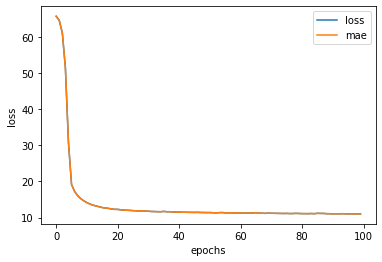

In [74]:
# Ploting history curve

pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [75]:
y_pred = model9.predict(X_test)

mae9 = mean_absolute_error(y_test, y_pred)
mse9 = mean_squared_error(y_test, y_pred)
r2_9 = r2_score(y_test, y_pred)
mae9, mse9, r2_9

7/7 [==============================] - 0s 2ms/step


(10.42057186126709, 163.06848860012178, 0.19932738064709754)

In [76]:
reading_metrics = pd.DataFrame({'mae':[mae1, mae2, mae3, mae4, mae5, mae6, mae7, mae8, mae9], 'mse':[mse1, mse2, mse3, mse4, mse5, mse6, mse7, mse8, mse9], 'r2':[r2_1, r2_2, r2_3, r2_4, r2_5, r2_6, r2_7, r2_8, r2_9]})
reading_metrics

,mae,mse,r2
0,10.030508,150.734082,0.259890
1,10.307080,164.842612,0.190616
2,10.328257,162.996008,0.199683
3,10.143164,154.259651,0.242579
4,10.264904,158.978896,0.219407
5,10.349910,161.480692,0.207124
6,10.460412,164.974669,0.189968
7,10.866739,176.836806,0.131724
8,10.420572,163.068489,0.199327


In [77]:
reading_model = model1

### Linear Regression got the best metrics for reading model with mean absolute error of `10.030508`


## Training Writing Model

In [78]:
X_w, y_w = dataset_writing.drop(columns='writing score'), dataset_writing['writing score']

In [79]:
X_w.head()

,gender_female,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_standard,test preparation course_completed
0,1,0,1,0,0,0,1,0,0,0,1,0
1,1,0,0,1,0,0,0,0,0,1,1,1
2,1,0,1,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,1,0


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_m, y_m, test_size=0.20, random_state = 43)

In [81]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

mae1 = mean_absolute_error(y_test, y_pred)
mse1 = mean_squared_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)
mae1, mse1, r2_1

(10.441469802972497, 163.05657047036632, 0.2748903353275097)

In [82]:
from sklearn.preprocessing import PolynomialFeatures

poly_transform = PolynomialFeatures(2, interaction_only=True)
X_train_poly = poly_transform.fit_transform(X_train)

model2 = LinearRegression()
model2.fit(X_train_poly, y_train)
y_pred = model2.predict(poly_transform.transform(X_test))

mae2 = mean_absolute_error(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)
mae2, mse2, r2_2

(10.983934616835768, 184.63683365493816, 0.17892328931293144)

In [83]:
from sklearn.svm import SVR

model3 = SVR()
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

mae3 = mean_absolute_error(y_test, y_pred)
mse3 = mean_squared_error(y_test, y_pred)
r2_3 = r2_score(y_test, y_pred)
mae3, mse3, r2_3

(10.983531417729878, 185.4758962728216, 0.17519199279579267)

In [84]:
model4 = SVR(kernel='linear')
model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)

mae4 = mean_absolute_error(y_test, y_pred)
mse4 = mean_squared_error(y_test, y_pred)
r2_4 = r2_score(y_test, y_pred)
mae4, mse4, r2_4

(10.65379977625796, 170.59568115289534, 0.2413640444018037)

In [85]:
model5 = SVR(kernel='sigmoid')
model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)

mae5 = mean_absolute_error(y_test, y_pred)
mse5 = mean_squared_error(y_test, y_pred)
r2_5 = r2_score(y_test, y_pred)
mae5, mse5, r2_5

(10.647959140248249, 173.32221809457275, 0.2292391831846584)

In [86]:
model6 = SVR(kernel='poly')
model6.fit(X_train, y_train)

y_pred = model6.predict(X_test)

mae6 = mean_absolute_error(y_test, y_pred)
mse6 = mean_squared_error(y_test, y_pred)
r2_6 = r2_score(y_test, y_pred)
mae6, mse6, r2_6

(11.297057403290147, 196.45523239906558, 0.12636708059592405)

In [87]:
model7 = SVR(kernel='poly', degree=4)
model7.fit(X_train, y_train)

y_pred = model7.predict(X_test)

mae7 = mean_absolute_error(y_test, y_pred)
mse7 = mean_squared_error(y_test, y_pred)
r2_7 = r2_score(y_test, y_pred)
mae7, mse7, r2_7

(11.515116615258512, 206.6628009314654, 0.08097420513988685)

In [88]:
model8 = SVR(kernel='poly', degree=5)
model8.fit(X_train, y_train)

y_pred = model8.predict(X_test)

mae8 = mean_absolute_error(y_test, y_pred)
mse8 = mean_squared_error(y_test, y_pred)
r2_8 = r2_score(y_test, y_pred)
mae8, mse8, r2_8

(11.753581134301504, 214.77464881841632, 0.0449009620671692)

In [89]:
# Creating the neural network
tf.random.set_seed(42)

# 1. Creating the model
model9 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[12]),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model9.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Visualizing the model
model9.summary()

tf.keras.utils.plot_model(model=model9, show_shapes=True)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 13        
                                                                 
 dense_11 (Dense)            (None, 32)                64        
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 750
Trainable params: 750
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install

In [90]:
history = model9.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 65.3936 - mae: 65.3936
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 64.3133 - mae: 64.3133
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 61.0039 - mae: 61.0039
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 51.7329 - mae: 51.7329
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 31.1954 - mae: 31.1954
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 18.9042 - mae: 18.9042
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 17.0887 - mae: 17.0887
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 15.8113 - mae: 15.8113
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 14.9688 - mae: 14.9688
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 14.4612 - mae: 14.4612
Epoch 11/100
25/25 [===================

25/25 [==============================] - 0s 2ms/step - loss: 10.9830 - mae: 10.9830
Epoch 86/100
25/25 [==============================] - 0s 2ms/step - loss: 10.9499 - mae: 10.9499
Epoch 87/100
25/25 [==============================] - 0s 2ms/step - loss: 10.9570 - mae: 10.9570
Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 10.9154 - mae: 10.9154
Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 10.9605 - mae: 10.9605
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 10.9519 - mae: 10.9519
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 10.9327 - mae: 10.9327
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 10.9180 - mae: 10.9180
Epoch 93/100
25/25 [==============================] - 0s 2ms/step - loss: 10.9068 - mae: 10.9068
Epoch 94/100
25/25 [==============================] - 0s 2ms/step - loss: 10.9736 - mae: 10.9736
Epoch 95/100
25/25 [=======================

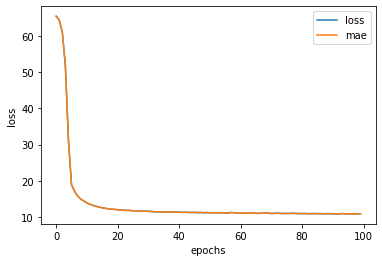

In [91]:
# Ploting history curve

pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [92]:
y_pred = model9.predict(X_test)

mae9 = mean_absolute_error(y_test, y_pred)
mse9 = mean_squared_error(y_test, y_pred)
r2_9 = r2_score(y_test, y_pred)
mae9, mse9, r2_9

7/7 [==============================] - 0s 2ms/step


(10.98846118927002, 181.3851235236274, 0.1933835863504887)

In [93]:
writing_metrics = pd.DataFrame({'mae':[mae1, mae2, mae3, mae4, mae5, mae6, mae7, mae8, mae9], 'mse':[mse1, mse2, mse3, mse4, mse5, mse6, mse7, mse8, mse9], 'r2':[r2_1, r2_2, r2_3, r2_4, r2_5, r2_6, r2_7, r2_8, r2_9]})
writing_metrics

,mae,mse,r2
0,10.441470,163.056570,0.274890
1,10.983935,184.636834,0.178923
2,10.983531,185.475896,0.175192
3,10.653800,170.595681,0.241364
4,10.647959,173.322218,0.229239
5,11.297057,196.455232,0.126367
6,11.515117,206.662801,0.080974
7,11.753581,214.774649,0.044901
8,10.988461,181.385124,0.193384


In [94]:
writing_model = model1

### Linear Regression got the best metrics for writing model with mean absolute error of `10.441470`

In [95]:
math_model.coef_

array([ -5.04199393, -10.35239095,  -8.41570695,  -7.4819135 ,
        -4.83600806,   4.31526429,   4.7511876 ,  -0.5858153 ,
         7.02859302,   4.35226579,  11.27689406,   6.12356942])

In [96]:
reading_model.coef_

array([ -5.73847307, -10.96247764,  -8.80339191,  -8.34396001,
        -5.23303079,   3.88505339,   6.75186806,  -0.5744124 ,
         7.51045074,   3.7117225 ,  10.45732255,   5.74739585])

In [97]:
writing_model.coef_

array([-4.41388376, -9.97121746, -7.44019545, -6.46560039, -4.72014049,
        4.46676461,  6.48729783, -0.55101591,  7.11491877,  3.52297245,
       10.93118065,  5.34127514])

In [98]:
X_train.columns

Index(['gender_female', 'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college', 'lunch_standard',
       'test preparation course_completed'],
      dtype='object')

In [99]:
coefs = pd.DataFrame({'attribute' : X_train.columns, 'math_coefs' : math_model.coef_, 'reading_coefs' : reading_model.coef_, 'writing_coefs' : writing_model.coef_})

In [100]:
coefs

,attribute,math_coefs,reading_coefs,writing_coefs
0,gender_female,-5.041994,-5.738473,-4.413884
1,race/ethnicity_group A,-10.352391,-10.962478,-9.971217
2,race/ethnicity_group B,-8.415707,-8.803392,-7.440195
3,race/ethnicity_group C,-7.481914,-8.343960,-6.465600
4,race/ethnicity_group D,-4.836008,-5.233031,-4.720140
5,parental level of education_associate's degree,4.315264,3.885053,4.466765
6,parental level of education_bachelor's degree,4.751188,6.751868,6.487298
7,parental level of education_high school,-0.585815,-0.574412,-0.551016
8,parental level of education_master's degree,7.028593,7.510451,7.114919
9,parental level of education_some college,4.352266,3.711723,3.522972
